Name: Manojkumar 
CWID: 20021499
Code written by: Manedge

# IMPORTANT:
ignore the warnings they are coming from an older version of sk learn being used. 
I am not updating sklearn because i need for this particular version another project i am working on  

# information 
We will be treating this problem as a binary class classification. 
The review rating 3 will be treated as a negative class  

In [1]:
import numpy as np
import pandas as pd
from string import punctuation, digits
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, classification_report
import gensim.downloader as api
import matplotlib.pyplot as plt

# torch packages 

In [2]:
import torch 
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics import Accuracy
device = torch.device('mps') if torch.backends.mps.is_available() else 'cpu'
device

device(type='mps')

In [3]:
accuracy = Accuracy(top_k=1, task='multiclass', num_classes=2).to(device=device)

# printing the metrics 

In [4]:
# Metric printing 
def metric_analysis(ytrue,ypred):
    print(confusion_matrix(ytrue,ypred))
    print("the accuracy is ",accuracy_score(ytrue,ypred))
    print("the precision is ",precision_score(ytrue,ypred))
    print("the recall is ",recall_score(ytrue,ypred))
    print(classification_report(ytrue, ypred))
    return accuracy_score(ytrue,ypred), precision_score(ytrue,ypred), recall_score(ytrue,ypred)

# Loading the dataset 

In [5]:
link = './dataset/amazon_reviews.csv'
data = pd.read_csv(link)
data.head()

,overall,reviewText
0,4,No issues.
1,5,"Purchased this for my device, it worked as adv..."
2,4,it works as expected. I should have sprung for...
3,5,This think has worked out great.Had a diff. br...
4,5,"Bought it with Retail Packaging, arrived legit..."


# convert the dataset into a binary class classification

In [6]:
data['overall'] = data.overall.map(lambda x: 0 if x <= 3 else 1)
data.head()

,overall,reviewText
0,1,No issues.
1,1,"Purchased this for my device, it worked as adv..."
2,1,it works as expected. I should have sprung for...
3,1,This think has worked out great.Had a diff. br...
4,1,"Bought it with Retail Packaging, arrived legit..."


In [7]:
data.overall.value_counts()

overall
1    4449
0     466
Name: count, dtype: int64

# Problem solution: 
* We are going to treat this question as a binary classification, either 0 or 1 
* all text will be converted to lower case and punctuations will be removed
* The reviews will be tokenized. This is all done using the library packages

## Function preprocessing
Takes in the review, converts it to lwoer case, removes punctuations, and tokenizes the words
Returns this list 

In [8]:
def preprocessing(review):
    # convert review to lower case
    review = str(review)
    review = review.lower()

    stop_words = set(stopwords.words('english'))
    # remove punctuations
    review = review.translate(str.maketrans('','', punctuation))

    # remove numbers
    review = review.translate(str.maketrans('', '', digits))


    # tokenize 
    review = word_tokenize(review, language='english', preserve_line=False)

    # remove stop words 
    review = [x for x in review if x not in stop_words]

    return review


In [9]:
# apply function to all the reviews 
data['reviewText'] = data.reviewText.apply(preprocessing)

In [10]:
data.head()

,overall,reviewText
0,1,[issues]
1,1,"[purchased, device, worked, advertised, never,..."
2,1,"[works, expected, sprung, higher, capacity, th..."
3,1,"[think, worked, greathad, diff, bran, gb, card..."
4,1,"[bought, retail, packaging, arrived, legit, or..."


# Data split
80% train
10% validation 
10% test

In [11]:
# splitting the dataset
xtrain, xtest, ytrain, ytest= train_test_split(data.reviewText, data.overall, test_size=0.2)
xtest, xval, ytest, yval = train_test_split(xtest, ytest, test_size=0.5)

# PERFORM DATA STATISTICS 

# max,min,avg sentance length in xtrain, xtest and xval 

In [12]:
xtrain.apply(lambda x: len(x)).mean(), xtest.apply(lambda x: len(x)).mean(), xval.apply(lambda x: len(x)).mean()

(25.03942014242116, 27.70468431771894, 25.721544715447155)

In [13]:
xtrain.apply(lambda x: len(x)).max(), xtest.apply(lambda x: len(x)).max(), xval.apply(lambda x: len(x)).max()

(544, 781, 400)

In [14]:
xtrain.apply(lambda x: len(x)).min(), xtest.apply(lambda x: len(x)).min(), xval.apply(lambda x: len(x)).min()

(1, 1, 1)

## number of training samples vs test and validation

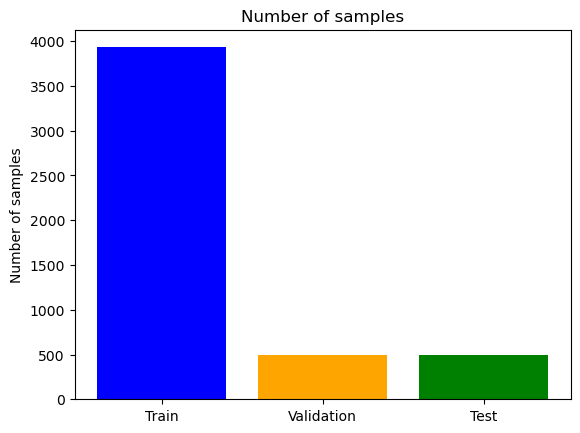

In [15]:
train_size, test_size, val_size = xtrain.shape[0], xtest.shape[0], xval.shape[0]


plt.bar(['Train', 'Validation', 'Test'], [train_size, val_size, test_size], color=['blue', 'orange', 'green'])
plt.title('Number of samples')
plt.ylabel('Number of samples')
plt.show()

In [16]:
max_tokens = []
min_tokens = []
avg_tokens = []
for i in range(2):
    lyst = data[data.overall == i].reviewText.apply(len)
    max_tokens.append(lyst.max())
    min_tokens.append(lyst.min())
    avg_tokens.append(lyst.mean())

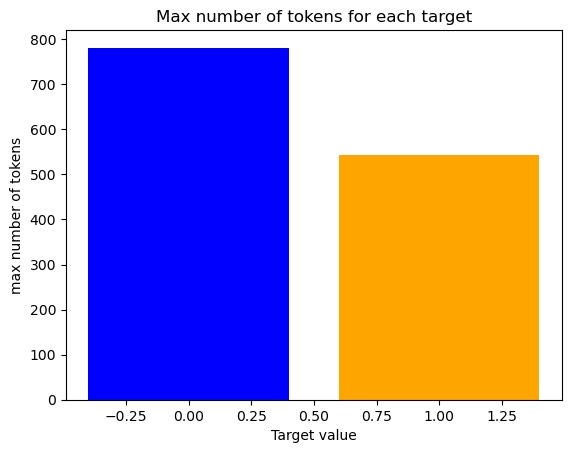

In [17]:
plt.bar(range(2), max_tokens, color=['blue', 'orange'])
plt.title('Max number of tokens for each target')
plt.ylabel('max number of tokens')
plt.xlabel('Target value')
plt.show()

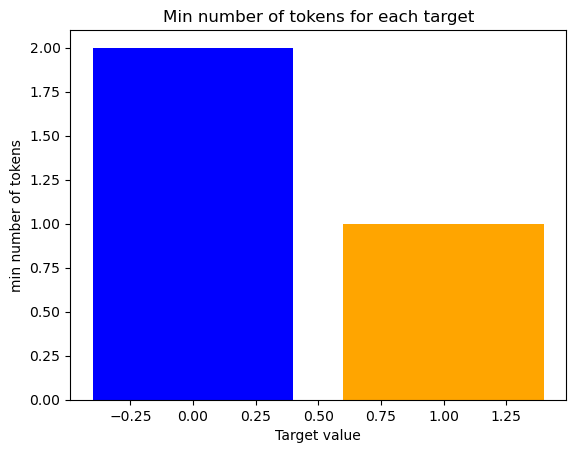

In [18]:
plt.bar(range(2), min_tokens, color=['blue', 'orange'])
plt.title('Min number of tokens for each target')
plt.ylabel('min number of tokens')
plt.xlabel('Target value')
plt.show()

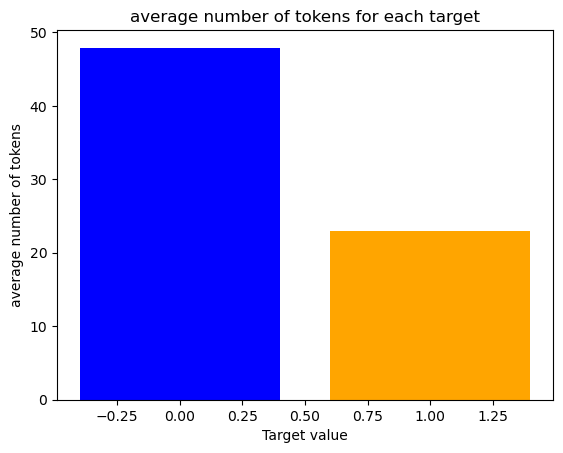

In [19]:
plt.bar(range(2), avg_tokens, color=['blue', 'orange'])
plt.title('average number of tokens for each target')
plt.ylabel('average number of tokens')
plt.xlabel('Target value')
plt.show()

## Number of samples in each target value {from 0 - 1} 

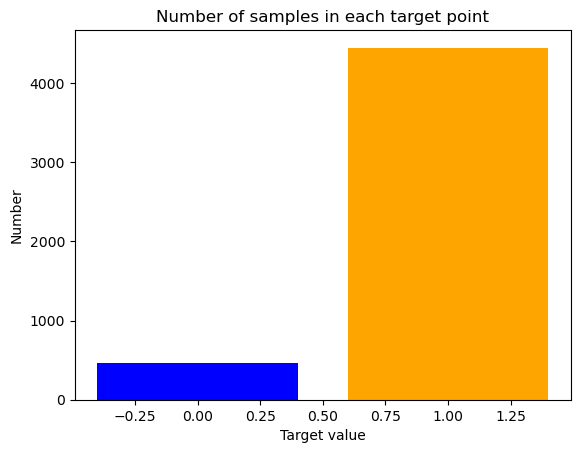

In [20]:
len_of_target = []
for i in range(2):
    len_of_target.append(data[data.overall == i].shape[0])

# plotting
plt.bar(range(2), len_of_target, color=['blue', 'orange'])
plt.title('Number of samples in each target point')
plt.ylabel('Number')
plt.xlabel('Target value')
plt.show()

# UNDERSTANDING OF THIS ANALYSIS 
* Poeple who are dissatisifed are the most vocal becasue the max, min and avergae number of tokens for the lower ratings is pretty high
* BIG ISSUE: the number of positive ratings are much higher than the number of negative ratings, whihc means that the model will be biased towards a positive response  
* The best way to solve this is to get more data or reduce the number of datapoints for 5, but as this is an NLP assignment im not going to do that 
* The precision recall of the negative class will be very low   

# Representation of text

In [21]:
class customTokenizer(): 
    def __init__(self, xtrain, pad_length = 200):
        self.pad_length = pad_length
        self.corpus_words = []
        self.word2ind = {}
        self.get_vocab(xtrain)
        

    def tokenize(self, sentance):
        tokens = []
        for word in sentance:
            if word in self.word2ind:
                tokens.append(self.word2ind[word])
            else:
                tokens.append(self.word2ind['<UNK>'])
        return tokens

    def pad_sequence(self, tokens):
        if len(tokens) > self.pad_length:
            tokens = tokens[:self.pad_length]
        else:
            tokens += [self.word2ind['<PAD>']] * (self.pad_length - len(tokens))
        return tokens
    
    # sentances is a dataframe 
    def transform(self, dataframe):
        dataframe = dataframe.apply(self.tokenize)
        dataframe = dataframe.apply(self.pad_sequence)
        return np.array(dataframe.tolist())

    def get_vocab(self, corpus):
        self.corpus_words = set([x for sentance in corpus for x in sentance])
        self.corpus_words = sorted(self.corpus_words)
        self.word2ind = {key:value for value, key in enumerate(self.corpus_words)}
        self.word2ind['<PAD>'] = len(self.corpus_words)
        self.word2ind['<UNK>'] = len(self.corpus_words) + 1
        
        

In [22]:
tokenizer = customTokenizer(xtrain, pad_length=100)

In [23]:
xtrain = tokenizer.transform(xtrain)
xtest = tokenizer.transform(xtest)
xval = tokenizer.transform(xval)

### Convert the np matrix into a torch tensor

In [24]:
ytrain = pd.get_dummies(ytrain).to_numpy().astype(int)
ytest = pd.get_dummies(ytest).to_numpy().astype(int)
yval = pd.get_dummies(yval).to_numpy().astype(int)

In [25]:
ytrain = torch.from_numpy(ytrain).to(device=device).float()
yval = torch.from_numpy(yval).to(device=device).float()
ytest = torch.from_numpy(ytest).to(device=device).float()

In [26]:
xtrain = torch.from_numpy(xtrain).to(device=device)
xtest = torch.from_numpy(xtest).to(device=device)
xval = torch.from_numpy(xval).to(device=device)

# data loader for x train 

In [27]:
batch_size= 32
training_loader = DataLoader(TensorDataset(xtrain, ytrain), shuffle=False, batch_size=batch_size)

# Creating the LSTM 
For this assignment we are creating a bidirectional LSTM  

In [28]:
class LSTM(torch.nn.Module): 
    def __init__(self, vocab_size, embed_size, hidden_dim= 30, output_dim = 2):
        super().__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim=embed_size)
        self.lstm = torch.nn.LSTM(
            input_size=embed_size, 
            hidden_size=hidden_dim,
            num_layers= 2, 
            dropout= 0.1,
            batch_first=True,
            bidirectional=True, 
        )
        
        self.fully_connected_layer = torch.nn.Sequential(
            torch.nn.Linear(hidden_dim*2, output_dim),
            torch.nn.Sigmoid(),
        )
        
    def forward(self, x):
        embedding_values = self.embedding(x)
        output, (hidden_states, cell_states) = self.lstm(embedding_values) # last hidden state
        lstm_output = torch.cat((hidden_states[-2,:,:], hidden_states[-1,:,:]), dim=1)
        output = self.fully_connected_layer(lstm_output)
        
        return output 
    
    

In [29]:
lstmModel = LSTM(len(tokenizer.corpus_words), embed_size=128, hidden_dim=30, output_dim=2).to(device=device)

In [30]:
lstmModel

LSTM(
  (embedding): Embedding(8468, 128)
  (lstm): LSTM(128, 30, num_layers=2, batch_first=True, dropout=0.1, bidirectional=True)
  (fully_connected_layer): Sequential(
    (0): Linear(in_features=60, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

# training LSTM

In [31]:
# defining model parameters 
BinaryLoss = torch.nn.BCEWithLogitsLoss()
lr = 1E-3
opt = torch.optim.SGD(lstmModel.parameters(), lr = lr)

In [43]:
epochs = 10
validation_loss_list = []
training_loss_list = []

for epoch in range(epochs):
    runningLoss = 0
    trueTrainingPreds = 0
    for idx, data in enumerate(training_loader): 
        inputs, labels = data
        opt.zero_grad()
        outputs = lstmModel(inputs)
        # loss calculation 
        loss = BinaryLoss(outputs, labels)
        
        runningLoss += loss.item()/len(training_loader)
        
        # back propagation 
        loss.backward()
        opt.step()
        
        trueTrainingPreds += batch_size * accuracy(torch.argmax(outputs, axis=1), torch.argmax(labels, axis=1))
        
    
    # validation set 
    val_outputs = lstmModel(xval)
    val_loss = BinaryLoss(val_outputs, yval).detach()
    val_accuracy = accuracy(torch.argmax(val_outputs, axis=1), torch.argmax(yval, axis=1))
    validation_loss_list.append(val_loss.detach().cpu())
    
    # training metrics 
    training_loss_list.append(runningLoss)
    trainingAcc = trueTrainingPreds / xtrain.shape[0]
    
    
    # printing the metrics 
    print(f'''epoch [{epoch+1}/{epochs}]
        \t training loss: {loss},
        \t validation loss: {val_loss},
        \t Training Acc: {trainingAcc},
        \t Val acc: {val_accuracy},
            ''')
    
    
        

epoch [1/10]
        	 training loss: 0.7115867137908936,
        	 validation loss: 0.7076758146286011,
        	 Training Acc: 0.872692883014679,
        	 Val acc: 0.8963414430618286,
            
epoch [2/10]
        	 training loss: 0.710177481174469,
        	 validation loss: 0.7062485218048096,
        	 Training Acc: 0.883628785610199,
        	 Val acc: 0.8983739614486694,
            
epoch [3/10]
        	 training loss: 0.7087730765342712,
        	 validation loss: 0.7048265337944031,
        	 Training Acc: 0.8904955387115479,
        	 Val acc: 0.8983739614486694,
            
epoch [4/10]
        	 training loss: 0.7073735594749451,
        	 validation loss: 0.7034097909927368,
        	 Training Acc: 0.8966357111930847,
        	 Val acc: 0.9024389982223511,
            
epoch [5/10]
        	 training loss: 0.7059791684150696,
        	 validation loss: 0.7019986510276794,
        	 Training Acc: 0.9001961946487427,
        	 Val acc: 0.9004064798355103,
           

In [44]:
ypred = lstmModel(xtest)
ypred = torch.argmax(ypred, axis=1).cpu()
metric_analysis(torch.argmax(ytest, axis=1).cpu(), ypred)

[[  0  49]
 [  2 440]]
the accuracy is  0.8961303462321792
the precision is  0.8997955010224948
the recall is  0.995475113122172
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.90      1.00      0.95       442

    accuracy                           0.90       491
   macro avg       0.45      0.50      0.47       491
weighted avg       0.81      0.90      0.85       491


(0.8961303462321792, 0.8997955010224948, 0.995475113122172)

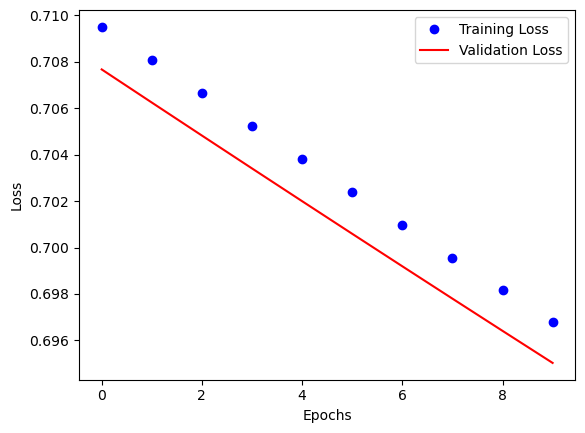

In [45]:
def plot_loss(epochs, all_training_loss, all_val_loss):    
    %matplotlib inline
    epochs = range(epochs)
    plt.plot(epochs, all_training_loss, 'bo', label='Training Loss')
    plt.plot(epochs, all_val_loss, 'r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(epochs, training_loss_list, validation_loss_list)

# CNN FOR NLP 

## data preprocessing 

In [46]:
def load_embedding_model():
    """ Load GloVe Vectors
    Return:
    wv_from_bin: All 400000 embeddings, each lengh 200
    """
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin

wv_from_bin = load_embedding_model()

Loaded vocab size 400000


In [47]:
def get_matrix_of_vectors(wv_from_bin, required_words):
    """ Put the GloVe vectors into a matrix M.
    Param:
    wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
    Return:
    M: numpy matrix shape (num words, 200) containing the vectors
    word2ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.seed(225)
    random.shuffle(words)
    word2ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2ind

mat_glove, word2ind_glove = get_matrix_of_vectors(wv_from_bin, tokenizer.corpus_words)

Shuffling words ...
Done.


# convert mat_glove to tensor 

In [48]:
mat_glove = torch.from_numpy(mat_glove).to(device=device)

In [49]:
mat_glove.shape

torch.Size([400000, 200])

In [69]:
class CNN_for_NLP(torch.nn.Module):
    def __init__(self, embed_dim, sequence_length, embedding_matrix, filter_count = 30, kernel_size = 3, max_pool_kernel_size= 2):
        super().__init__()
        self.embedding = torch.nn.Embedding.from_pretrained(embedding_matrix)
        
        self.max_pool_kernel_size = max_pool_kernel_size
        
        self.fc_in_features = (sequence_length - kernel_size + 1 ) // self.max_pool_kernel_size
        
        # self.embedding = torch.nn.Embedding(vocab_size, embedding_dim=embed_dim)
        self.conv = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels = 1, # FIX 
                out_channels = filter_count, 
                kernel_size=(kernel_size, embed_dim), 
            ),
            torch.nn.ReLU(),
        )
        
        self.fully_connected = torch.nn.Sequential(
            torch.nn.Linear(
                in_features= filter_count * self.fc_in_features, # FIX
                out_features=2, 
            ),
            torch.nn.Sigmoid(),
        )
    
    def forward(self, x):
        emb = self.embedding(x).unsqueeze(1)
        conv_output = self.conv(emb).squeeze(3)
        conv_output = torch.nn.functional.max_pool1d(conv_output, kernel_size= self.max_pool_kernel_size).squeeze(2)
        conv_output = conv_output.flatten(start_dim=1)
        output = self.fully_connected(conv_output)
        return output    
    

In [70]:
cnn = CNN_for_NLP(200, len(xtrain[0]), mat_glove).to(device=device)

In [71]:
cnn

CNN_for_NLP(
  (embedding): Embedding(400000, 200)
  (conv): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 200), stride=(1, 1))
    (1): ReLU()
  )
  (fully_connected): Sequential(
    (0): Linear(in_features=1470, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [72]:
BinaryLoss = torch.nn.BCELoss()
opt = torch.optim.Adam(lr=0.001, params=cnn.parameters())

## training the CNN model 

In [73]:
epochs = 10
validation_loss_list = []
training_loss_list = []

for epoch in range(epochs):
    runningLoss = 0
    trueTrainingPreds = 0
    for idx, data in enumerate(training_loader): 
        inputs, labels = data
        opt.zero_grad()
        outputs = cnn(inputs)
        
        loss = BinaryLoss(outputs, labels)
        runningLoss += loss.detach() / batch_size
        
        trueTrainingPreds += batch_size * accuracy(torch.argmax(outputs, axis=1), torch.argmax(labels, axis=1))
        
        loss.backward()
        opt.step()
        
    # validation set
    val_outputs = cnn(xval)
    val_loss = BinaryLoss(val_outputs, yval)
    val_accuracy = accuracy(torch.argmax(val_outputs, axis=1), torch.argmax(yval, axis=1))
    validation_loss_list.append(val_loss.detach().cpu())
    
    # training metrics
    training_loss_list.append(runningLoss.cpu())
    training_accuracy = trueTrainingPreds / xtrain.shape[0]
    
    
    # printing the epoch related metrics
    print(f'''epoch [{epoch+1}/{epochs}]
        \t training loss: {loss},
        \t validation loss: {val_loss},
        \t Val acc: {val_accuracy},
            ''')
    
    
        
        

epoch [1/10]
        	 training loss: 0.196322962641716,
        	 validation loss: 0.2688438296318054,
        	 Val acc: 0.9024389982223511,
            
epoch [2/10]
        	 training loss: 0.19829818606376648,
        	 validation loss: 0.26209041476249695,
        	 Val acc: 0.9024389982223511,
            
epoch [3/10]
        	 training loss: 0.12996971607208252,
        	 validation loss: 0.249859020113945,
        	 Val acc: 0.9024389982223511,
            
epoch [4/10]
        	 training loss: 0.07993578910827637,
        	 validation loss: 0.2459295243024826,
        	 Val acc: 0.9065040946006775,
            
epoch [5/10]
        	 training loss: 0.05426225811243057,
        	 validation loss: 0.2594793438911438,
        	 Val acc: 0.9065040946006775,
            
epoch [6/10]
        	 training loss: 0.04875423386693001,
        	 validation loss: 0.26276934146881104,
        	 Val acc: 0.9186992049217224,
            
epoch [7/10]
        	 training loss: 0.0549047887325

In [74]:
ypred = cnn(xtest)
ypred = torch.argmax(ypred, axis=1).cpu()
metric_analysis(torch.argmax(ytest, axis=1).cpu(), ypred)

[[  0  49]
 [  1 441]]
the accuracy is  0.8981670061099797
the precision is  0.9
the recall is  0.997737556561086
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.90      1.00      0.95       442

    accuracy                           0.90       491
   macro avg       0.45      0.50      0.47       491
weighted avg       0.81      0.90      0.85       491


(0.8981670061099797, 0.9, 0.997737556561086)

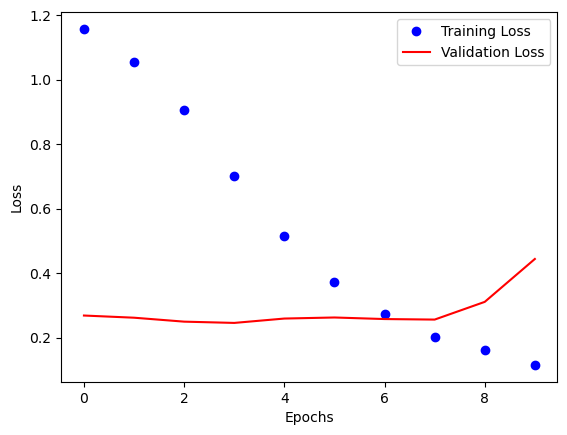

In [75]:
plot_loss(epochs, training_loss_list, validation_loss_list)

# discussion on the model performances

4.2 
Both models performed pretty poorly. The dataset was so biased towards one class that the model struggled to learn anyhting about the other class. most of the metrics are skewed towards the positive prediction class. 

In terms of comparison, it seems that the CNN model has overfit badly, and the LSTM has not overfit. It can actually be trianed for more epochs. From the next assignemnt, i will try synthenizing the data or i will downsample the dataset to get a better ratio 

4.3 
The difference is mainly in how we approach the problem. Since the problem is 0-1 classification problem, the accuracy recall and precision seem high. I think the LSTM model performs best, its hard to compare because they are 2 seperate problems. But i think the LSTM works best, high accuracy, at least for the positive class. I think if we remove the bias towards the positive class, the LSTM will perform significantly better. 

#### Question 1
Q1: Rate your performance
1-Very unsatisfied
2-Somewhat unsatisfied
3-Neutral
4-Somewhat satisfied
5-Very satisfied

Answer: 3 - Neutral, i was confused about the raw coding of the LSTM and the CNN as i coudlnt get the shapes of the models right  

#### Question 2
Q2: How much does your understanding of the concepts influence
your performance?
1-Very unimportant
2-Somewhat unimportant
3-Neutral
4-Somewhat important
5-Very important

Answer: 5 - Very important. My understanding of CNN and how to define the parameters helped me most. I also used online tools to help me find the shapes of the CNN model. 

#### Question 3
Q3: How much does the design of the examples/questions (is relatable
to you) influence your performance?
1-Very unimportant
2-Somewhat unimportant
3-Neutral
4-Somewhat important
5-Very important

Answer: 5 - Very important. The questions were structured in an organized way 

#### Question 4: 
Q4: When you answer Q3, which are the primary factors influencing
the relatability of the examples to you?
1-Gender
2-Race
3-Age
4-Culture background
5- Socioeconomic Status
6- Hobbies and interests
7- Prior knowledge about the context

Answer: 7 prior Knowledge about the context 
 